In [4]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def load_variavle(filename):
    f=open(filename,'rb')
    r=pickle.load(f)
    f.close()
    return r

train_loss_per_epoch = load_variavle('save/train_loss_per_epoch.bin')
valid_loss_per_epoch = load_variavle('save/valid_loss_per_epoch.bin')

train_acc_per_epoch  = load_variavle('save/train_acc_per_epoch.bin')
valid_acc_per_epoch  = load_variavle('save/valid_acc_per_epoch.bin')

In [6]:
def remove_torch(tensor_list: list) -> list:
    ret = tensor_list.copy()
    for i, _ in enumerate(ret):
        ret[i] = ret[i].item()
    
    return ret

pd_train_loss_per_epoch = pd.Series(train_loss_per_epoch)
pd_valid_loss_per_epoch = pd.Series(valid_loss_per_epoch)
pd_train_acc_per_epoch  = pd.Series(remove_torch(train_acc_per_epoch))
pd_valid_acc_per_epoch  = pd.Series(remove_torch(valid_acc_per_epoch))
loss = pd.concat([pd_train_loss_per_epoch, pd_valid_loss_per_epoch], axis=1)
acc  = pd.concat([pd_train_acc_per_epoch, pd_valid_acc_per_epoch], axis=1)

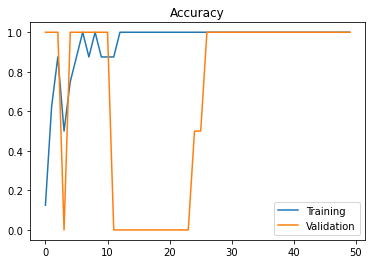

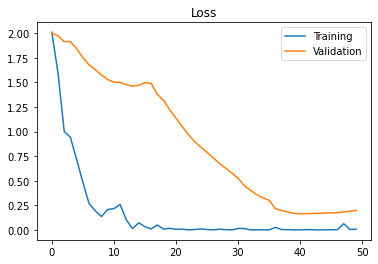

In [9]:
loss.columns = ['Training', 'Validation']
acc.columns = ['Training', 'Validation']

plt.figure(1)
plt.plot(acc, label=acc.columns)
plt.title('Accuracy')
plt.legend()
plt.savefig("save/acc.png", dpi=700, format='png')
plt.savefig("save/acc.svg", format='svg')

plt.figure(2)
plt.plot(loss, label=loss.columns)
plt.title('Loss')
plt.legend()
plt.savefig("save/loss.png", dpi=700, format='png')
plt.savefig("save/loss.svg", format='svg')